In [16]:
from nltk.corpus import movie_reviews

from sklearn.model_selection import train_test_split

import numpy as np

import torch

import keras
from keras.layers import TextVectorization, Dense, Conv1D, MaxPooling1D, Embedding, Dropout, Flatten
from keras.models import Sequential

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fileids = movie_reviews.fileids()
reviews = [movie_reviews.raw(fileid) for fileid in fileids]
categories = [movie_reviews.categories(fileid)[0] for fileid in fileids]

In [5]:
# 1. 백엔드 이름 확인
print(f"현재 Keras 백엔드: {keras.backend.backend()}")

# 2. GPU 사용 가능 여부 확인 (PyTorch 방식)
print(f"GPU 사용 가능: {torch.cuda.is_available()}")

# 3. 간단한 Keras 모델 생성 및 장치 확인
model = keras.Sequential([keras.layers.Dense(10, input_shape=(5,))])
# Keras 텐서가 어떤 장치에 있는지 확인 (PyTorch 백엔드일 경우)
print(f"모델 파라미터가 위치한 장치: {next(model.parameters()).device}")

현재 Keras 백엔드: torch
GPU 사용 가능: True
모델 파라미터가 위치한 장치: cuda:0


c:\Coding\Local\python_text_mining\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
max_words = 10000
maxlen = 500

In [7]:
tokenizer = TextVectorization(max_tokens=max_words, output_sequence_length=maxlen)
tokenizer.adapt(reviews)
X = tokenizer(reviews)
print(X.shape)

torch.Size([2000, 500])


In [8]:
vocab = tokenizer.get_vocabulary()
word_index = {word: index for index, word in enumerate(vocab)}
print(word_index['the'])
print(word_index['review'])

2
457


In [10]:
label_dict = {'pos':1, 'neg':0}
y = np.array([label_dict[c] for c in categories])
print(set(y))

{np.int64(0), np.int64(1)}


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [18]:
model = Sequential([
    Embedding(max_words, 64, input_length=maxlen),
    Conv1D(128, 5, padding='valid', activation='relu', strides=1),
    MaxPooling1D(),
    Conv1D(256, 5, padding='valid', activation='relu', strides=1),
    MaxPooling1D(),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.build(input_shape=(None, maxlen))
model.summary()

c:\Coding\Local\python_text_mining\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 500, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 496, 128)       │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 248, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 244, 256)       │       164,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 122, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 31232)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │     1,998,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,844,161 (10.85 MB)

 Trainable params: 2,844,161 (10.85 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=256, validation_split=0.2, verbose=True)

Epoch 1/50


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5180 - loss: 0.6959 - val_accuracy: 0.5031 - val_loss: 0.6936
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5227 - loss: 0.6929 - val_accuracy: 0.5063 - val_loss: 0.6931
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5273 - loss: 0.6913 - val_accuracy: 0.5063 - val_loss: 0.6926
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6438 - loss: 0.6840 - val_accuracy: 0.5125 - val_loss: 0.6953
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5703 - loss: 0.6678 - val_accuracy: 0.5250 - val_loss: 0.6907
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6961 - loss: 0.6368 - val_accuracy: 0.5000 - val_loss: 0.6902
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8516 - loss: 0.5650 - val_accuracy: 0.5531 - val_loss: 0.6762
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8656 - loss: 0.4433 - val_accuracy: 0.6656 - val_loss: 0.6258
Epoch 9/50


In [20]:
def plot_results(history, metric):
    plt.plot(history.history[metric], 'b', label='Training '+metric)
    plt.plot(history.history['val_'+metric], 'r--', label='Validation '+metric)
    plt.title('Training vs. Validation '+metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend()
    plt.show()

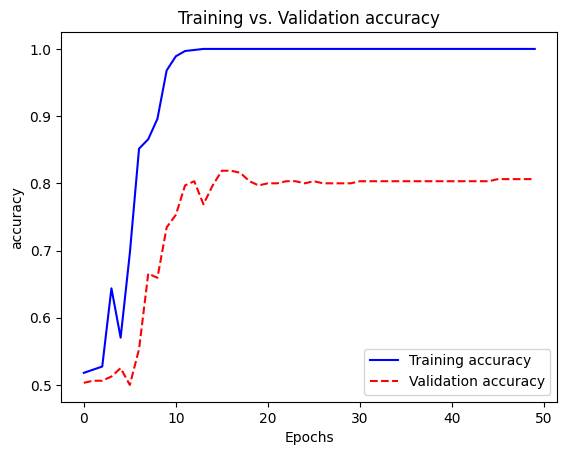

In [21]:
plot_results(history, 'accuracy')

In [22]:
score = model.evaluate(X_test, y_test)
print(f'{score[1]:.3f}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8075 - loss: 0.7558
0.808
